In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("C:/Users/test/Downloads/2008/2008.csv")


In [21]:
%matplotlib inline

In [2]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [ ]:
sns.boxplot(df.DepTime);

In [ ]:
sns.countplot(df[df.UniqueCarrier.isin(df.UniqueCarrier.value_counts().head(10).index)].UniqueCarrier);

In [ ]:
[u for  u in ['DL','AA','OO','EV'] if u not in (df.UniqueCarrier.value_counts().head(10).index)]

In [ ]:
feat=[f for f in df.columns if 'Delay' in f]
feat.remove('DepDelay')
feat.remove('ArrDelay')
print(feat)


National Air System    54904
Carrier                54330
Weather                28188
Security                  12
Name: CancellationCode, dtype: int64


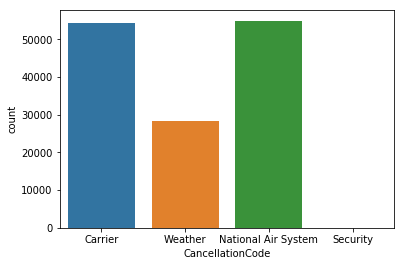

In [94]:
#df[df['Cancelled']==1]
cancReas=['Carrier','Weather','National Air System','Security']
droppedDf=df['CancellationCode'].dropna()
d=pd.Series(index=droppedDf.unique(),data=cancReas).to_dict()
droppedDf['CancellationReason']=droppedDf.map(d)
print(droppedDf['CancellationReason'].value_counts())
sns.countplot(droppedDf['CancellationReason']);

In [47]:
df['CancellationCode'].value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

SFO LAX    13788
Name: Route, dtype: int64


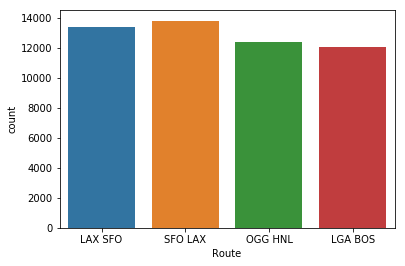

In [3]:
df['Route']=df['Origin']+' '+df['Dest']
df[df['Route'].isin(df['Route'].value_counts().head(4).index)]['Route']
print(df['Route'].value_counts().head(1))
sns.countplot(df[df['Route'].isin(df['Route'].value_counts().head(4).index)]['Route']);

In [4]:
#df['DepDelayYes']=df['DepDelay']
#df['DepDelayYes']=df['DepDelayYes'].apply(lambda x: False if x <= 0 else True)
df['DepDelayYes']=df['DepDelay']>0
df['DepDelayYes'].value_counts()


False    4308754
True     2700974
Name: DepDelayYes, dtype: int64

In [16]:
delayRoute= df[df['DepDelayYes']]['Route'].value_counts().head(5).index
df[(df['Route'].isin(delayRoute))&(df['WeatherDelay']!=0)]['WeatherDelay'].dropna().count()

668

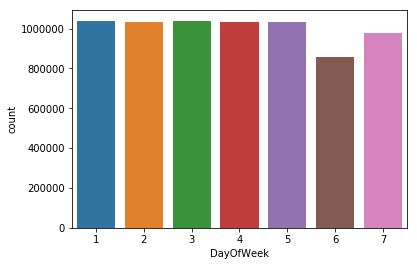

In [90]:
sns.countplot( df['DayOfWeek']);


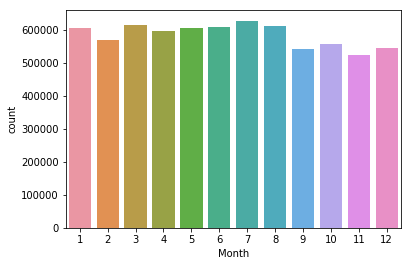

In [91]:
sns.countplot(df['Month']);

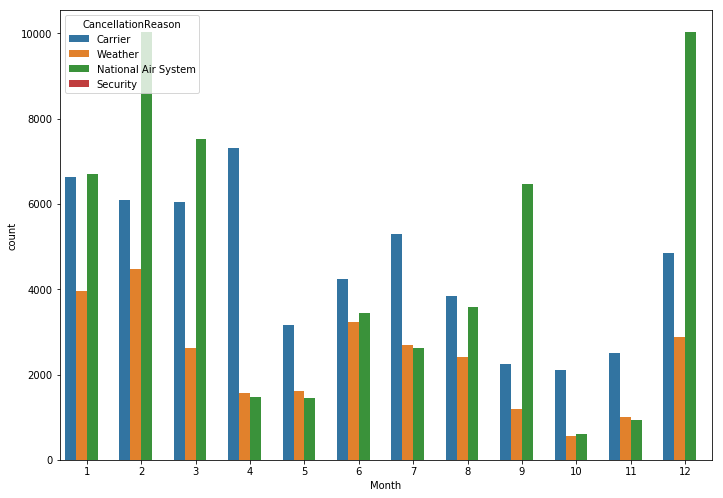

In [103]:
#sns.countplot(df[df['CancellationReason']=='Weather']['Month']);
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(x=df['Month'],hue=df['CancellationReason'],ax=ax);


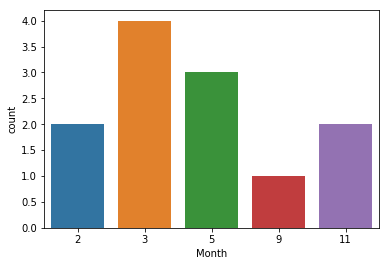

In [104]:
sns.countplot(df[df['CancellationReason']=='Security']['Month']);

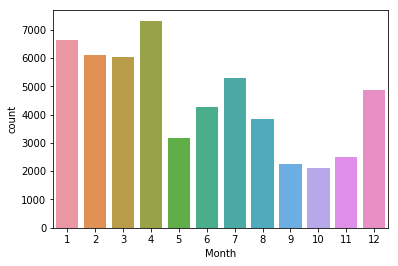

In [97]:
sns.countplot(df[df['CancellationReason']=='Carrier']['Month']);

In [95]:
#df[df['Cancelled']==1]
cancReas=['Carrier','Weather','National Air System','Security']
d=pd.Series(index=df['CancellationCode'].dropna().unique(),data=cancReas).to_dict()
df['CancellationReason']=df['CancellationCode'].map(d)
print(df['CancellationReason'].value_counts())


National Air System    54904
Carrier                54330
Weather                28188
Security                  12
Name: CancellationReason, dtype: int64


In [105]:
df[(df['CancellationReason']=='Carrier')&(df['Month']==4)]['UniqueCarrier'].value_counts().head()

AA    3696
WN     533
UA     494
YV     454
9E     391
Name: UniqueCarrier, dtype: int64

In [9]:
data=df[df['UniqueCarrier']=='WN']['DepTime']
#lambda a: a if (a<3)
a=[x for x in data if x >= 3]

#df['ADelay']=df['ArrDelay']>0
#sns.boxplot(df['UniqueCarrier'],df['DDelay'] )

In [33]:
df = pd.DataFrame({'Type':list('ABBC'), 'Set':list('ZZXY')})
%timeit df['color'] = ['red' if x == 'Z' else 'green' for x in df['Set']]
%timeit df['color'] = np.where(df['Set']=='Z', 'green', 'red')
%timeit df['color'] = df.Set.map( lambda x: 'red' if x == 'Z' else 'green')

SyntaxError: invalid syntax (<ipython-input-33-4eceff2c1008>, line 1)

In [36]:
df['MyDep']=[x if x>=0 else None for x in df['DepTime']]
df['MyArr']=[x if x>=0 else None for x in df['ArrTime']]


In [37]:
df.groupby(['UniqueCarrier'])['MyDep'].median()

UniqueCarrier
9E    1342.0
AA    1320.0
AQ    1304.5
AS    1331.0
B6    1333.0
CO    1310.0
DL    1310.0
EV    1308.0
F9    1354.0
FL    1342.0
HA    1319.0
MQ    1310.0
NW    1324.0
OH    1327.0
OO    1326.0
UA    1314.0
US    1329.0
WN    1339.0
XE    1316.0
YV    1342.0
Name: MyDep, dtype: float64

In [45]:
mydf=pd.DataFrame()
mydf[['UniqueCarrier','Dep']]=df[['UniqueCarrier','MyDep']]
df['Dep']=df['MyArr']
mydf=mydf[['UniqueCarrier','Dep']].append(df[['UniqueCarrier','Dep']])
mydf.groupby(['UniqueCarrier'])['Dep'].median()

UniqueCarrier
9E    1423.0
AA    1427.0
AQ    1331.0
AS    1423.0
B6    1419.0
CO    1427.0
DL    1419.0
EV    1356.0
F9    1442.0
FL    1431.0
HA    1338.0
MQ    1354.0
NW    1416.0
OH    1422.0
OO    1407.0
UA    1415.0
US    1430.0
WN    1426.0
XE    1414.0
YV    1422.0
Name: Dep, dtype: float64